In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import gradio as gr ##used to implement UI/UX

# Preprocessing of Dataset

In [ ]:
dataset=pd.read_csv('The_Grades_Dataset.csv') #reading dataset

In [ ]:
dataset.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [ ]:
#Checking for null values and filling them with average of all the feature values
features_with_null = [features for features in dataset if dataset[features].isnull().sum()]
for each_feature in features_with_null:
    dataset[each_feature] = dataset[each_feature].fillna(dataset[each_feature].mode()[0])

In [ ]:
dataset.isnull().sum() #again checking for null values

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [ ]:
# Converting grades of courses in the dataset to their corresponding GPA values
# i.e converting qualitative data into quantitative data in the dataset to feed to regression algorithm
courses = ['PH-121','HS-101','CY-105','HS-105/12','MT-111','CS-105','CS-106','EL-102','EE-119','ME-107','CS-107',
           'HS-205/20','MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214','EE-217','CS-212','CS-215',
           'MT-331','EF-303','HS-304','CS-301','CS-302','TC-383','MT-442','EL-332','CS-318','CS-306','CS-312','CS-317',
           'CS-403','CS-421','CS-406','CS-414','CS-419','CS-423','CS-412']
for i in courses:
        dataset[i]=dataset[i].replace('A+',4.0)
        dataset[i]=dataset[i].replace('A',4.0)
        dataset[i]=dataset[i].replace('A-',3.7)
        dataset[i]=dataset[i].replace('B+',3.4)
        dataset[i]=dataset[i].replace('B',3.0)
        dataset[i]=dataset[i].replace('B-',2.7)
        dataset[i]=dataset[i].replace('C+',2.4)
        dataset[i]=dataset[i].replace('C',2.0)
        dataset[i]=dataset[i].replace('C-',1.7)
        dataset[i]=dataset[i].replace('D+',1.4)
        dataset[i]=dataset[i].replace('D',1.0)
        dataset[i]=dataset[i].replace('F',0.0)
        dataset[i]=dataset[i].replace('IP',0.0)
        dataset[i]=dataset[i].replace('P',0.0)
        dataset[i]=dataset[i].replace('X',0.0)
        dataset[i]=dataset[i].replace('I',0.0)
        dataset[i]=dataset[i].replace('W',0.0)
        dataset[i]=dataset[i].replace('WU',0.0)

In [ ]:
dataset.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,CS-97005,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [ ]:
#separaing label for all the models
Y=dataset[['CGPA']]
Y.head() #Y=CGPA

,CGPA
0,2.205
1,2.008
2,3.608
3,1.906
4,3.448


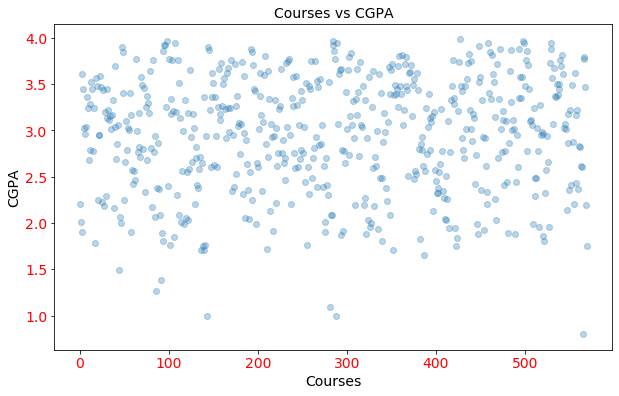

In [ ]:
plt.figure(figsize=(10,6))
X=dataset.drop(['CGPA', 'Seat No.'], axis='columns')
x=np.arange(0,len(X),1)
plt.scatter(x,Y,alpha=0.3) #alpha sets transparency of dots
plt.title('Courses vs CGPA',fontsize=14)
plt.xlabel('Courses',fontsize=14)
plt.ylabel('CGPA',fontsize=14)
plt.xticks(color='red',fontsize=14)
plt.yticks(color='red',fontsize=14)
plt.show()

# Model 1 (Prediction of CGPA on the Basis of First Year Courses)

In [ ]:
#dropping inputs which don't affect the CGPA prediction of first year courses
model1X=dataset.drop(['HS-205/20','MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214','EE-217','CS-212','CS-215',
           'MT-331','EF-303','HS-304','CS-301','CS-302','TC-383','MT-442','EL-332','CS-318','CS-306','CS-312','CS-317',
           'CS-403','CS-421','CS-406','CS-414','CS-419','CS-423','CS-412', 'Seat No.', 'CGPA'], axis='columns')
model1X.head() #Model 1 Features

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,3.4
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,2.7
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,1.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,2.0


In [ ]:
#splitting the dataset into training and testing set on 80:20 ratio
X_train,X_test,Y_train,Y_test = train_test_split(model1X, Y,test_size=0.2,random_state=0)

## Algorithm 1: Linear Regression

In [ ]:
#Model 1 1st Algorithm
linear1=LinearRegression() #creating an object of linear regression
linear1.fit(X_train,Y_train)
r_squared=linear1.score(X_test,Y_test) #calculating value for R-squared
print('Training Accuracy:',linear1.score(X_train,Y_train)*100)
print('Testing Accuracy:',r_squared*100)

Training Accuracy: 83.97211612644767
Testing Accuracy: 81.41336830277862


## Algorithm 2: Random Forest

In [ ]:
# Model 1 2nd Algorithm
forest1=RandomForestRegressor(n_estimators=20,max_depth=10,criterion='mse') # creating object of random forest
# train model
forest1.fit(X_train,Y_train.values.ravel())
print('Training Accuracy:',forest1.score(X_train,Y_train)*100)
print('Testing Accuracy:',forest1.score(X_test, Y_test)*100)

Training Accuracy: 97.04747594138263
Testing Accuracy: 81.10600385584411


# Model 2

In [ ]:
#dropping inputs which don't affect the CGPA prediction of first and second year courses
model2X=dataset.drop(["CS-403","CS-421", "CS-406", "CS-414", "CS-419", "CS-423", "CS-412", "MT-442", "Seat No.", "CGPA", 'MT-331','EF-303','HS-304','CS-301','CS-302','TC-383','EL-332','CS-318','CS-306','CS-312','CS-317'], axis='columns')
model2X.head() # Model 2 Features

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.0,3.7,2.7,2.4,1.4,1.4,1.0,4.0,1.0,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,2.7,1.7,1.4,1.4,1.0,2.0,1.0,2.7,2.0,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.7,1.0,2.0,3.4,2.4,1.0,1.4,1.0,1.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,4.0,3.7,3.7,3.7,2.7,4.0,3.7,4.0,3.7,3.7


In [ ]:
# Splitting the dataset into training and testing set on 80:20 ratio
X_train,X_test,Y_train,Y_test = train_test_split(model2X, Y,test_size=0.2,random_state=0)

## Algorithm 1: Linear Regression

In [ ]:
#Model2 First Algorithm
linear2=LinearRegression() # creates an object of Linear Regression
linear2.fit(X_train,Y_train) #training model
r_squared=linear2.score(X_test,Y_test) #calculation R-squared value
print('Training Accuracy:',linear2.score(X_train,Y_train)*100)
print('Testing Accuracy:',r_squared*100)

Training Accuracy: 90.88336931042303
Testing Accuracy: 90.66851498286941


## Algorithm 2: Random Forest

In [ ]:
#Model 2 2nd Algorithm
forest2=RandomForestRegressor(n_estimators=20, max_depth=10, criterion='mse') #create an object of Random Forest
forest2.fit(X_train,Y_train.values.ravel()) # train model
print('Training Accuracy:',forest2.score(X_train,Y_train)*100)
print('Testing Accuracy:',forest2.score(X_test, Y_test)*100)

Training Accuracy: 97.91845160887779
Testing Accuracy: 90.88146309487611


# Model 3

In [ ]:
#dropping inputs which don't affect the CGPA prediction of first, second year and third year courses
model3X=dataset.drop(["CS-403","CS-421", "CS-406", "CS-414", "CS-419", "CS-423", "CS-412", "MT-442", "Seat No.", "CGPA"], axis='columns')
model3X.head() #Model 3 Features

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4


In [ ]:
# Splitting the dataset into training and testing set on 80:20 ratio
X_train,X_test,Y_train,Y_test = train_test_split(model3X, Y,test_size=0.2,random_state=0)

## Algorithm 1: Linear Regression

In [ ]:
#Model3 First Algorithm
linear3=LinearRegression()
linear3.fit(X_train,Y_train)
r_squared=linear3.score(X_test,Y_test) #calculating r-squared
print('Training Accuracy:',linear3.score(X_train,Y_train)*100)
print('Testing Accuracy:',r_squared*100)

Training Accuracy: 93.50820728538469
Testing Accuracy: 95.56728040239842


## Algorithm 2: Random Forest

In [ ]:
# Model 3 Second Algorithm
forest3=RandomForestRegressor(n_estimators=20, max_depth=10, criterion='mse')
# train model
forest3.fit(X_train,Y_train.values.ravel())
print('Training Accuracy:',forest3.score(X_train,Y_train)*100)
print('Testing Accuracy:',forest3.score(X_test, Y_test)*100)

Training Accuracy: 98.152669623483
Testing Accuracy: 94.31213960158509


# Implementing UI/UX

In [ ]:
# Dropdown options defined for UI/UX
PH121 = gr.Dropdown(['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label ='PH-121')
HS101 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'HS-101')
CY105 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CY-105')
HS105 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'HS-105')
MT111 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'MT-111')
CS105 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-105')
CS106 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-106')
EL102 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'EL-102')
EE119 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'EE-119')
ME107 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'ME-107')
CS107 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-107')
HS205 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'HS-205')
MT222 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'MT-222')
EE222 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'EE-222')
MT224 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'MT-224')
CS210 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-210')
CS211 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-211')
CS203 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-203')
CS214 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-214')
EE217 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'EE-217')
CS212 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-212')
CS215 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-215')
MT331 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'MT-331')
EF303 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'EF-303')
HS304 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'HS-304')
CS301 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-301')
CS302 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-302')
TC383 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'TC-383')
EL332 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'EL-332')
CS318 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-318')
CS306 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-306')
CS312 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-312')
CS317 = gr.Dropdown(choices=['A+', 'A', 'A-','B+', 'B','B-', 'C+','C','C-','D+','D', 'F', 'IP','P','X','I','W','WU'], label = 'CS-317')
text1 = gr.Textbox(label="CGPA Predicted By Linear Regression model")
text2 = gr.Textbox(label="CGPA Predicted By Random Forest model")

In [ ]:
def conversion(grades):
#     This function takes a list of grades as input,
#     converts the value of grades into their corresponding gpa value and returns the list of grades as 2d list.
    for i in range(len(grades)):
        if grades[i]=='A+' or grades[i]=='A':
            grades[i]=4.0
        elif grades[i]=='A-':
            grades[i]=3.7
        elif grades[i]=='B+':
            grades[i]=3.4
        elif grades[i]=='B':
            grades[i]=3.0
        elif grades[i]=='B-':
            grades[i]=2.7
        elif grades[i]=='C+':
            grades[i]=2.4
        elif grades[i]=='C':
            grades[i]=2.0
        elif grades[i]=='C-':
            grades[i]=1.7
        elif grades[i]=='D+':
            grades[i]=1.4
        elif grades[i]=='D':
            grades[i]=1.0
        else:
            grades[i]=0.0
    return [grades]

In [ ]:
#Prediction Of CGPA
def pred(Model, *grade):
    # Takes grades of courses from interface as input and return the prediction of CGPA.
    grades=[]
    for i in grade:
        grades.append(i) #putting all inputs in a list
    gpa = conversion(grades) # calls a function 'conversion' which converts grades into their gpa values
    if Model=="Model 1":
        # predicts cgpa based on all gpa values of 1st year
        prediction1 = str(linear1.predict(gpa))
        prediction2 = str(forest1.predict(gpa))
    elif Model=="Model 2":
         # predicts cgpa based on all gpa values of 1st and 2nd year
        prediction1 = str(linear2.predict(gpa))
        prediction2 = str(forest2.predict(gpa))
    else:
         # predicts cgpa based on all gpa values of 1st, 2nd and 3rd year
        prediction1 = str(linear3.predict(gpa))
        prediction2 = str(forest3.predict(gpa))
    return prediction1[2:7], prediction2[1:6]

In [ ]:
#Launching UI/UX for Model 1
Model1 = gr.Variable(value="Model 1")
demo1 = gr.Interface(pred, inputs=[Model1, PH121,HS101,CY105,HS105,MT111,CS105,CS106,EL102,EE119,ME107,CS107],
             outputs=[text1, text2], title="CGPA Prediction on 1st Year Grades", allow_flagging="never")

In [ ]:
#Launching UI/UX for Model 2
Model2 = gr.Variable(value="Model 2")
demo2 = gr.Interface(pred, inputs=[Model2, PH121,HS101,CY105,HS105,MT111,CS105,CS106,EL102,EE119,ME107,CS107, HS205,MT222,EE222,MT224,
                                  CS210,CS211,CS203,CS214,EE217,CS212,CS215],
             outputs=[text1, text2], title="CGPA Prediction on 1st & 2nd Year Grades", allow_flagging="never")

In [ ]:
#Launching UI/UX for Model 3
Model3 = gr.Variable(value="Model 3")
demo3 = gr.Interface(pred, inputs=[Model3, PH121,HS101,CY105,HS105,MT111,CS105,CS106,EL102,EE119,ME107,CS107,HS205,MT222,EE222,MT224,
                                  CS210,CS211,CS203,CS214,EE217,CS212,CS215,MT331,EF303,HS304,CS301,CS302,TC383,EL332,CS318,
                                  CS306,CS312,CS317],
             outputs=[text1, text2], title="CGPA Prediction on 1st, 2nd & 3rd Year Grades", allow_flagging="never")

In [ ]:
demo = gr.TabbedInterface([demo1, demo2, demo3], ["Model 1", "Model 2", "Model 3"])
demo.launch(inbrowser="True")

Running on local URL:  http://127.0.0.1:7875/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x1fc2b0e2688>, 'http://127.0.0.1:7875/', None)